In [2]:
from keras.models import load_model
from keras.models import Model
import numpy as np
from PIL import Image
import os 
import matplotlib.pyplot as plt
import cv2

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from skimage.metrics import mean_squared_error as mse
from matplotlib.patches import Ellipse

In [19]:
## load test data and normalize it

# testData = "C:/Users/mostafaosama2/Desktop/autoenctrain/test"
testData = "../../Data/100Images"
new_test = []

for filename in os.listdir(testData):
    if filename.endswith('.tif'):
        image = Image.open(os.path.join(testData, filename)) 
        new_test.append(np.asarray( image, dtype="uint8" ))
        
x_test = np.asarray(new_test)
x_test = x_test.astype('float32') / 255.
x_test.shape

(79, 96, 96, 3)

In [9]:
## Data loading, and standardizing
directory = "../../Data/Kather_all"

kather_test = []

# Test on 1000 images
for filename in os.listdir(directory):
    if filename.endswith('.tif'):
        image = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_UNCHANGED)
        resized_image = cv2.resize(image, (96, 96)) 
        kather_test.append(np.asarray( resized_image, dtype="uint8" ))
        
kather_test = np.asarray(kather_test)
kather_test = kather_test.astype('float32') / 255.
kather_test.shape

(5000, 96, 96, 3)

In [22]:
kather_test[0:25].shape

(25, 96, 96, 3)

In [23]:
def loadAndEvaluateModel(model , dataMatrix):
    mseList = []
    autoencoder = load_model(model) 
    decoded_imgs = autoencoder.predict(dataMatrix[0:25])
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(dataMatrix[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        mseList.append(mse(dataMatrix[i],decoded_imgs[i]))
#         plt.imshow(decoded_imgs[0][i]) # regression autoenc
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    print("Average Mse : {}".format(sum(mseList) / len(mseList)))
    return mseList

W0109 01:46:46.257213 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0109 01:46:46.527740 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


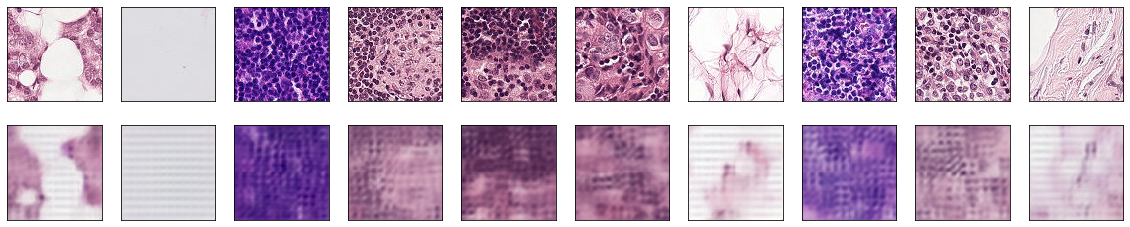

In [17]:
loadAndEvaluateModel('SavedModels/mean_squared_error_epochs300_batch64_bad.h5')

W0108 16:21:30.190757 4321239936 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0108 16:21:33.972105 4321239936 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0108 16:25:12.902957 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0108 16:25:13.035610 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0108 16:25:13.088088 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

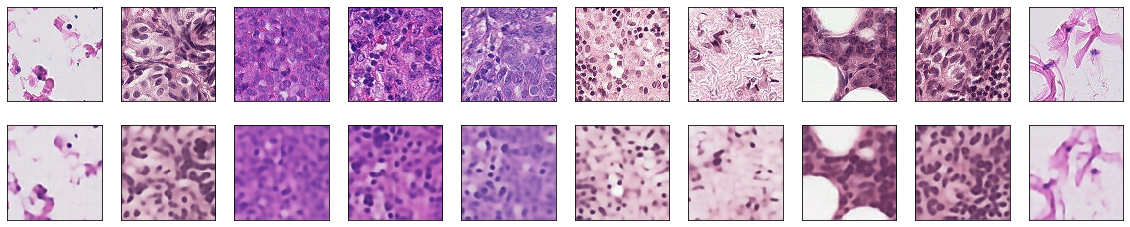

In [5]:
loadAndEvaluateModel('SavedModels/fulldata_checkpoint_epochs10000_batch32_adam.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


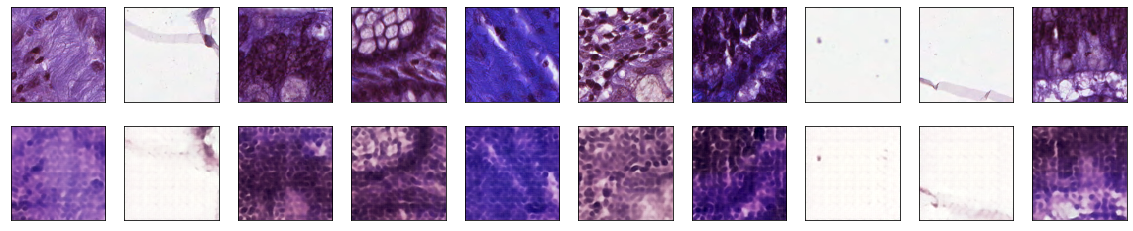

[0.01060128853969142,
 0.00355252242343441,
 0.011760168074388297,
 0.022165473360126444,
 0.010440320140081172,
 0.033395688885322856,
 0.019085105838234348,
 0.001066164684866523,
 0.0022000206624520034,
 0.013238984389182928]

In [7]:
mselist = loadAndEvaluateModel('SavedModels/autoencoder_train_epochs100_batch32_best.h5')
mselist

W1225 15:14:09.861701 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


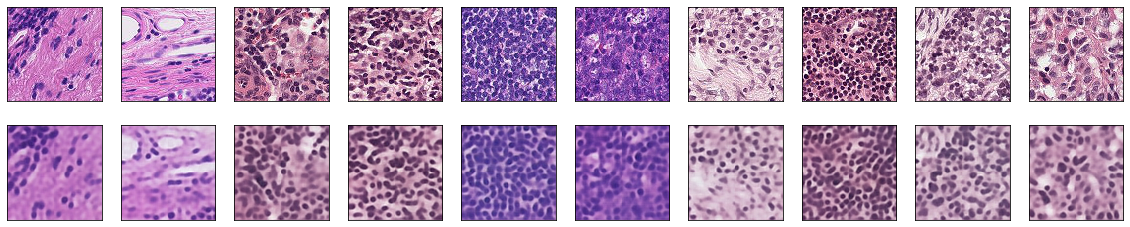

In [7]:
loadAndEvaluateModel('SavedModels/autoencoder_train_epochs100_batch32_adam.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


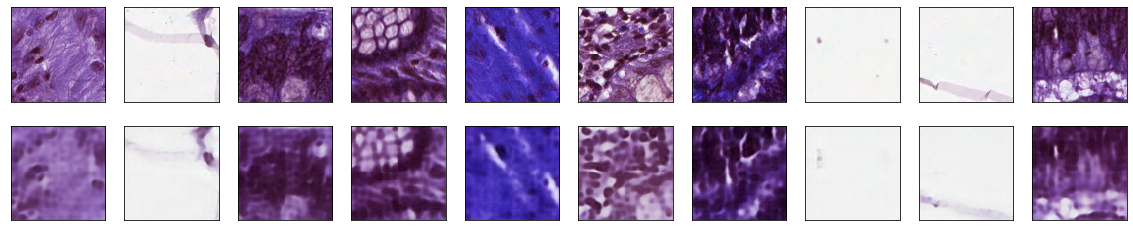

Average Mse : 0.0040232520376844326


[0.0044224945785061205,
 0.000834822111468408,
 0.003311243561152077,
 0.005864438298271735,
 0.003278402932853086,
 0.01138098230815441,
 0.0053835573703289825,
 0.00016409709277615895,
 0.0005496798718384712,
 0.005042802251494883]

In [25]:
mselist = loadAndEvaluateModel('SavedModels/feb_epochs1000_batch32_adam.h5', kather_test)
mselist

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


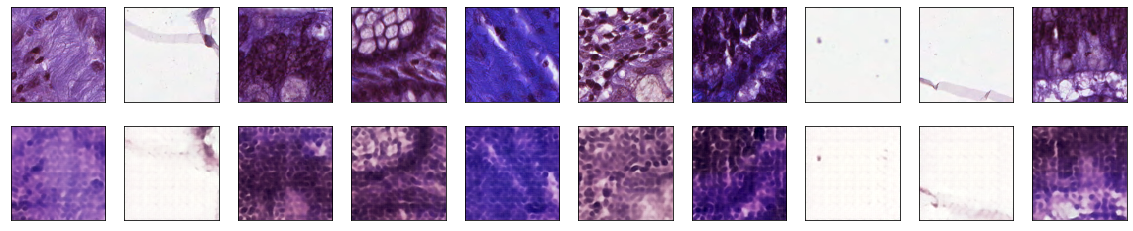

Average Mse : 0.012750573699778039


[0.01060128853969142,
 0.00355252242343441,
 0.011760168074388297,
 0.022165473360126444,
 0.010440320140081172,
 0.033395688885322856,
 0.019085105838234348,
 0.001066164684866523,
 0.0022000206624520034,
 0.013238984389182928]

In [24]:
mselist = loadAndEvaluateModel('SavedModels/autoencoder_train_epochs100_batch32_best.h5', kather_test)
mselist

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


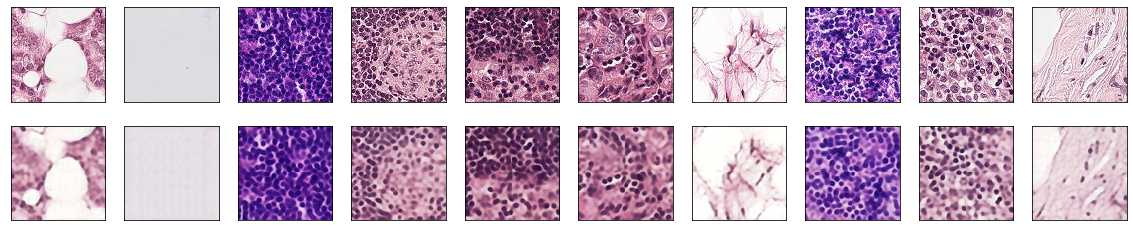

Average Mse : 0.012963607280298089


[0.006880712251031205,
 0.0004739022963898339,
 0.011811446649888624,
 0.024973400128003555,
 0.014169253718801863,
 0.013613875363243969,
 0.004918924831019833,
 0.021263805687012312,
 0.02175378643195393,
 0.00977696544563575]

In [20]:
mselist = loadAndEvaluateModel('SavedModels/autoencoder_train_epochs100_batch32_best.h5', x_test)
mselist